In [ ]:
# -- Import and upload data --
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # for beautful graphs.

sns.set_style("darkgrid")

movies = pd.read_csv("../data_clean/movies_clean.csv")
reviews = pd.read_csv("../data_clean/reviews_tmdb_clean.csv")

movies.head()

,title,year,runtime_min,genre,imdb_rating,director,votes,Gross
0,Alien,1979,117,"Horror, Sci-Fi",8.5,Ridley Scott,905275,$78.90M
1,Psycho,1960,109,"Horror, Mystery, Thriller",8.5,Alfred Hitchcock,689068,$32.00M
2,The Shining,1980,146,"Drama, Horror",8.4,Stanley Kubrick,1051582,$44.02M
3,The Thing,1982,109,"Horror, Mystery, Sci-Fi",8.2,John Carpenter,439793,$13.78M
4,Tumbbad,2018,104,"Drama, Fantasy, Horror",8.2,Rahi Anil Barve,53297,NaN


In [ ]:
# --Basic Summary Section--
print("Movies shape:", movies.shape)
display(movies.describe(include="all"))

print("\nReviews shape:", reviews.shape)
display(reviews[["rating"]].describe())

Movies shape: (836, 8)


,title,year,runtime_min,genre,imdb_rating,director,votes,Gross
count,836,836.000000,836.000000,836,836.000000,836,8.360000e+02,637
unique,799,NaN,NaN,79,NaN,544,NaN,572
top,House on Haunted Hill,NaN,NaN,"Horror, Mystery, Thriller",NaN,John Carpenter,NaN,$0.02M
freq,2,NaN,NaN,98,NaN,11,NaN,8
mean,NaN,2004.271531,100.767943,NaN,6.160167,NaN,1.005172e+05,NaN
std,NaN,16.330837,14.484556,NaN,0.940355,NaN,1.082769e+05,NaN
min,NaN,1920.000000,57.000000,NaN,1.600000,NaN,2.503700e+04,NaN
25%,NaN,1998.000000,91.000000,NaN,5.600000,NaN,3.812800e+04,NaN
50%,NaN,2009.000000,98.000000,NaN,6.200000,NaN,6.075550e+04,NaN
75%,NaN,2016.000000,108.000000,NaN,6.800000,NaN,1.203340e+05,NaN



Reviews shape: (2099, 7)


,rating
count,1968.000000
mean,6.309451
std,2.041952
min,0.500000
25%,5.000000
50%,7.000000
75%,8.000000
max,10.000000


MOVIE EDA

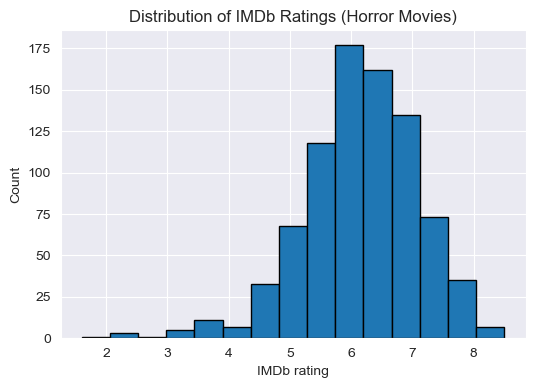

In [ ]:
# -- IMDb Rating Distribution Plot --
plt.figure(figsize=(6,4))
plt.hist(movies["imdb_rating"], bins=15, edgecolor="black")
plt.xlabel("IMDb rating")
plt.ylabel("Count")
plt.title("Distribution of IMDb Ratings (Horror Movies)")
plt.show()

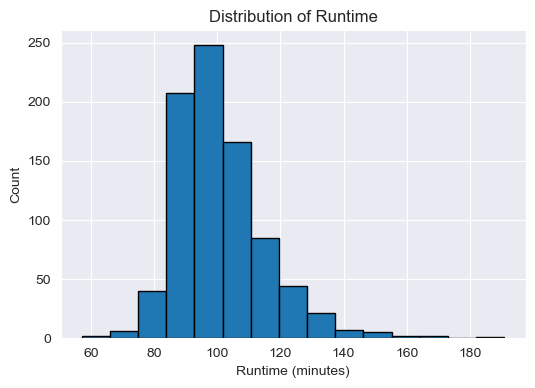

In [4]:
# -- Runtime Distribution Plot --
plt.figure(figsize=(6,4))
plt.hist(movies["runtime_min"].dropna(), bins=15, edgecolor="black")
plt.xlabel("Runtime (minutes)")
plt.ylabel("Count")
plt.title("Distribution of Runtime")
plt.show()

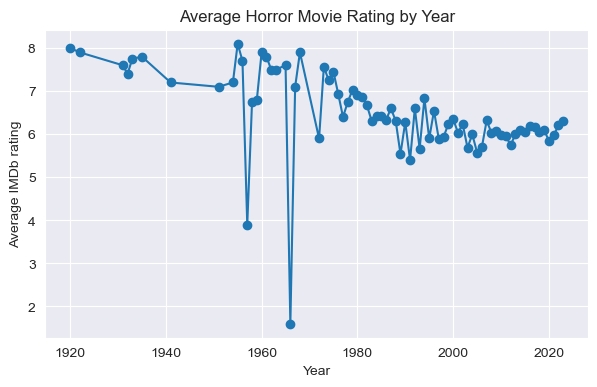

In [5]:
# -- Average IMDb Rating by Year Plot --
yearly = movies.groupby("year")["imdb_rating"].mean().dropna()

plt.figure(figsize=(7,4))
plt.plot(yearly.index, yearly.values, marker="o")
plt.xlabel("Year")
plt.ylabel("Average IMDb rating")
plt.title("Average Horror Movie Rating by Year")
plt.show()

In [6]:
# Genre / Subgenre Analysis
# We have differences as horror and thriller
# e.g., "Horror, Thriller"
def extract_primary_genre(g):
    # "Horror, Thriller" -> "Horror"
    if pd.isna(g):
        return None
    return g.split(",")[0].strip()

movies["primary_genre"] = movies["genre"].apply(extract_primary_genre)

movies["primary_genre"].value_counts().head(10)

primary_genre
Horror       324
Drama        167
Action       143
Comedy        91
Crime         39
Adventure     33
Fantasy       29
Animation      8
Biography      2
Name: count, dtype: int64

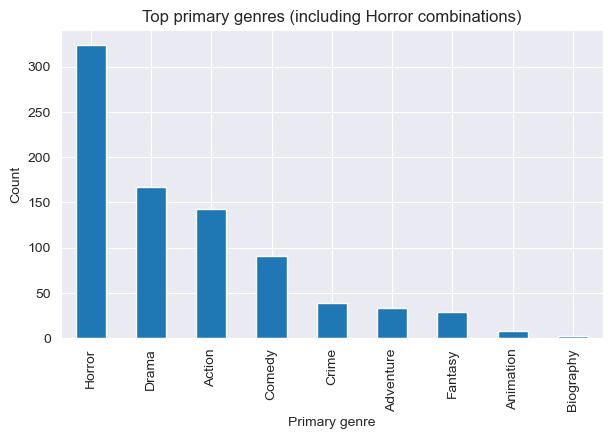

In [ ]:
plt.figure(figsize=(7,4))
movies["primary_genre"].value_counts().head(10).plot(kind="bar")
plt.xlabel("Primary genre")
plt.ylabel("Count")
plt.title("Top primary genres (including Horror combinations)")
plt.show()

REVIEW EDA

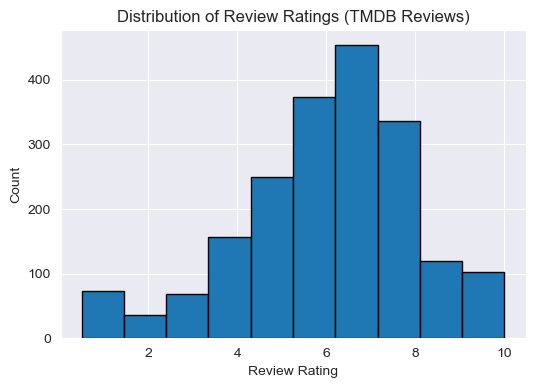

In [8]:
plt.figure(figsize=(6,4))
plt.hist(reviews["rating"].dropna(), bins=10, edgecolor="black")
plt.xlabel("Review Rating")
plt.ylabel("Count")
plt.title("Distribution of Review Ratings (TMDB Reviews)")
plt.show()


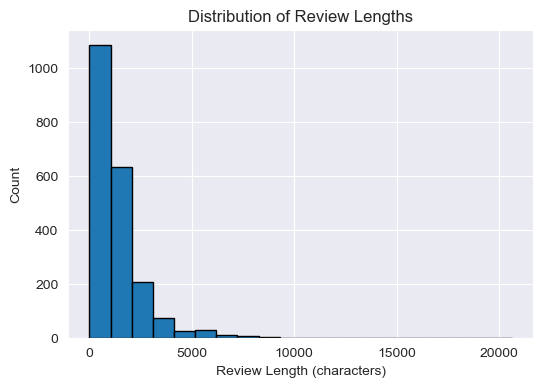

In [11]:
reviews["review_length"] = reviews["review_text"].apply(lambda x: len(str(x)))

plt.figure(figsize=(6,4))
plt.hist(reviews["review_length"], bins=20, edgecolor="black")
plt.xlabel("Review Length (characters)")
plt.ylabel("Count")
plt.title("Distribution of Review Lengths")
plt.show()


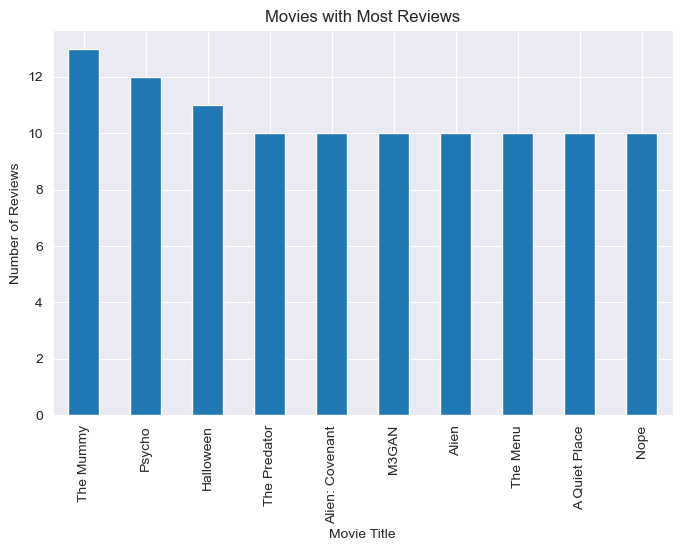

In [13]:
reviews_per_movie = reviews.groupby("title")["review_text"].count().sort_values(ascending=False)

plt.figure(figsize=(8,5))
reviews_per_movie.head(10).plot(kind="bar")
plt.title("Movies with Most Reviews")
plt.ylabel("Number of Reviews")
plt.xlabel("Movie Title")
plt.show()


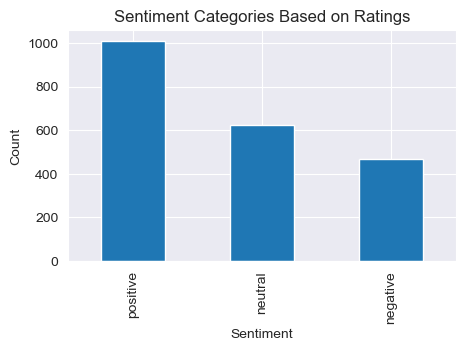

In [14]:
def label_sentiment(r):
    if r >= 7:
        return "positive"
    elif r >= 5:
        return "neutral"
    else:
        return "negative"

reviews["sentiment"] = reviews["rating"].apply(label_sentiment)

reviews["sentiment"].value_counts().plot(kind="bar", figsize=(5,3))
plt.title("Sentiment Categories Based on Ratings")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()
